# Hrant Gharagyozyan, DSB 2023-2024

## Importing Packages and Data

In [246]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [165]:
data = pd.read_csv("weather-check.csv")
data.head()

,RespondentID,Do you typically check a daily weather report?,How do you typically check the weather?,A specific website or app (please provide the answer),"If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?",Age,What is your gender?,How much total combined money did all members of your HOUSEHOLD earn last year?,US Region
0,3887201482,Yes,The default weather app on your phone,-,Very likely,30 - 44,Male,"$50,000 to $74,999",South Atlantic
1,3887159451,Yes,The default weather app on your phone,-,Very likely,18 - 29,Male,Prefer not to answer,-
2,3887152228,Yes,The default weather app on your phone,-,Very likely,30 - 44,Male,"$100,000 to $124,999",Middle Atlantic
3,3887145426,Yes,The default weather app on your phone,-,Somewhat likely,30 - 44,Male,Prefer not to answer,-
4,3887021873,Yes,A specific website or app (please provide the ...,Iphone app,Very likely,30 - 44,Male,"$150,000 to $174,999",Middle Atlantic


## Exploring and Transforming Necessary Variables

In [166]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 928 entries, 0 to 927
Data columns (total 9 columns):
 #   Column                                                                                                                                        Non-Null Count  Dtype 
---  ------                                                                                                                                        --------------  ----- 
 0   RespondentID                                                                                                                                  928 non-null    int64 
 1   Do you typically check a daily weather report?                                                                                                928 non-null    object
 2   How do you typically check the weather?                                                                                                       928 non-null    object
 3   A specific website or app (please provide

In [167]:
unique_regions = data['US Region'].unique()
print(unique_regions)

['South Atlantic' '-' 'Middle Atlantic' 'West South Central' 'Pacific'
 'West North Central' 'East North Central' 'Mountain' 'New England'
 'East South Central']


In [168]:
data['US Region'] = data['US Region'].replace('-', 'No answer')
data['If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?'] = data['If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?'].replace('-', 'No Answer')
priority_order1 = ['Very likely', 'Somewhat likely', 'Somewhat unlikely', 'Very unlikely', 'No Answer']
priority_order2 = ['No answer','East North Central', 'East South Central', 'Middle Atlantic', 'Mountain', 'New England', 'Pacific', 'South Atlantic', 'West North Central', 'West South Central']
data['If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?'] = pd.Categorical(data['If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?'], categories = priority_order1, ordered = True)
data['US Region'] = pd.Categorical(data['US Region'], categories = priority_order2, ordered = True)
data.head(3)

,RespondentID,Do you typically check a daily weather report?,How do you typically check the weather?,A specific website or app (please provide the answer),"If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?",Age,What is your gender?,How much total combined money did all members of your HOUSEHOLD earn last year?,US Region
0,3887201482,Yes,The default weather app on your phone,-,Very likely,30 - 44,Male,"$50,000 to $74,999",South Atlantic
1,3887159451,Yes,The default weather app on your phone,-,Very likely,18 - 29,Male,Prefer not to answer,No answer
2,3887152228,Yes,The default weather app on your phone,-,Very likely,30 - 44,Male,"$100,000 to $124,999",Middle Atlantic


## Creating Stacked Barcharts

### 100% Stacked Bar 

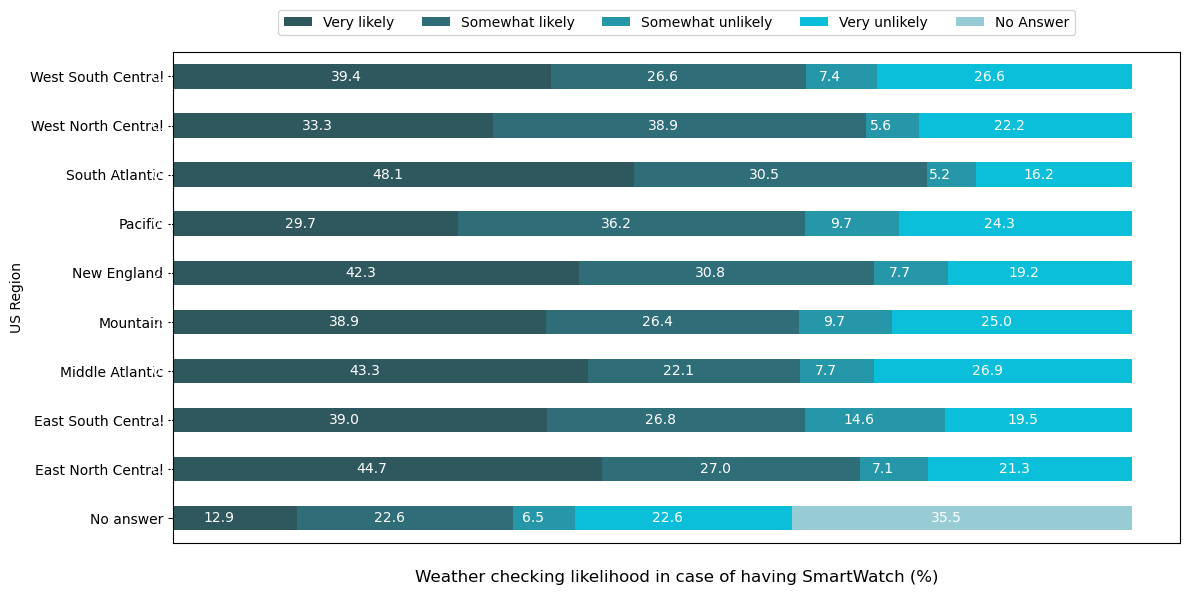

In [253]:
normalized_counts = data.groupby('US Region')['If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?'].value_counts(normalize=True).unstack().fillna(0) * 100

colors = ["#2f585e", "#2f6e78", "#2597a8", "#0bbfdb", "#98ccd4"]

ax = normalized_counts.plot(kind = 'barh', stacked = True, figsize = (12, 6), color = colors)
plt.legend(loc = 'upper center', bbox_to_anchor = (0.5, 1.1), ncol = len(priority_order))

for bar in ax.patches:
    height = bar.get_height()
    width = bar.get_width()
    x = bar.get_x()
    y = bar.get_y()
    label_text = f'{width:.1f}' 
    label_x = x + width / 2
    label_y = y + height / 2
    ax.text(label_x, label_y, label_text, ha = 'right', va = 'center', color = "white")
    

plt.annotate('Weather checking likelihood in case of having SmartWatch (%)', xy = (0.5, -0.08), xycoords = 'axes fraction', ha = 'center', fontsize = 12)
plt.tick_params(axis = "x", bottom = False, labelbottom = False)
plt.tight_layout()
plt.show()

### A Stacked Bar 

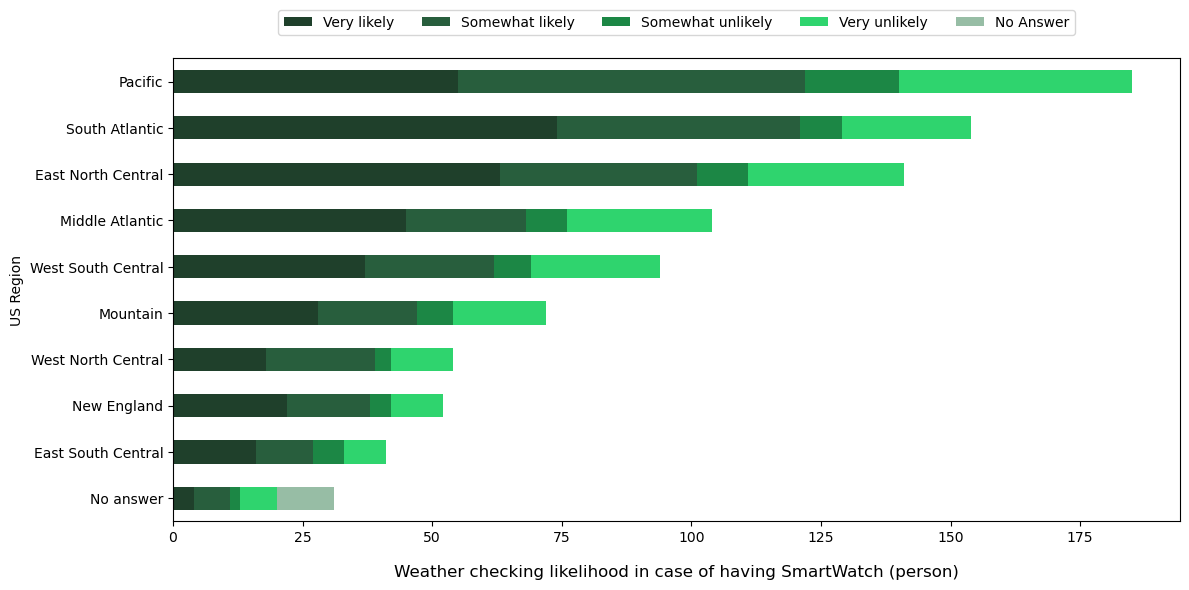

In [255]:
counts = data.groupby('US Region')['If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?'].value_counts().unstack().fillna(0)

counts['total_length'] = counts.sum(axis=1)
counts = counts.sort_values(by='total_length', ascending=True)
counts.drop('total_length', axis=1, inplace=True)

colors = ["#1f402b", "#285e3d", "#1c8745", "#2fd46e", "#97bda5"]

ax = counts.plot(kind='barh', stacked=True, figsize = (12, 6), color = colors)
plt.legend(loc = 'upper center', bbox_to_anchor = (0.5, 1.12), ncol = len(counts.columns))
plt.annotate('Weather checking likelihood in case of having SmartWatch (person)', xy = (0.5, -0.12), xycoords = 'axes fraction', ha = 'center', fontsize = 12)
plt.tight_layout()
plt.show()